# Step 1

## dog_shallow_focus


In [2]:
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
import urllib
import os

In [18]:
model_dir = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\models'
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

(2732, 4096, 3)


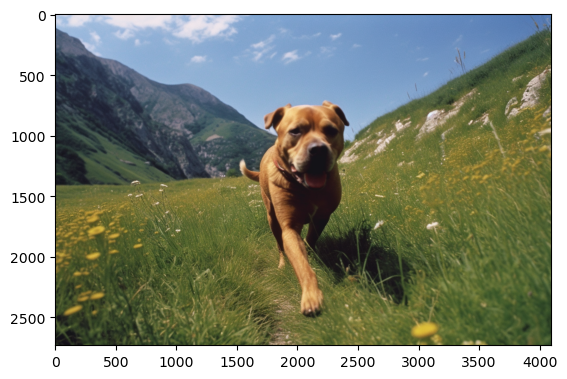

In [36]:
img_path = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\dog.png'
img_orig = cv2.imread(img_path) 
print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
# DeepLab 모델 로드 / Load DeepLab model
model = semantic_segmentation()
model.load_pascalvoc_model(model_file) 


In [38]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [39]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

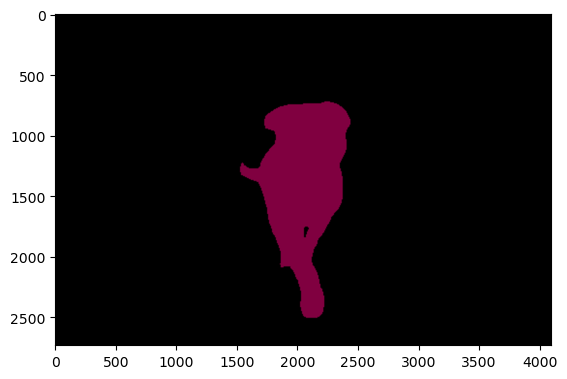

In [40]:
plt.imshow(output)
plt.show()

In [41]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력


{'class_ids': array([ 0, 12], dtype=int64),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [42]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [43]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [44]:
colormap[12]

array([ 64,   0, 128])

In [45]:
# RGB2BGR
seg_color = (128, 0 , 64)

(2732, 4096)


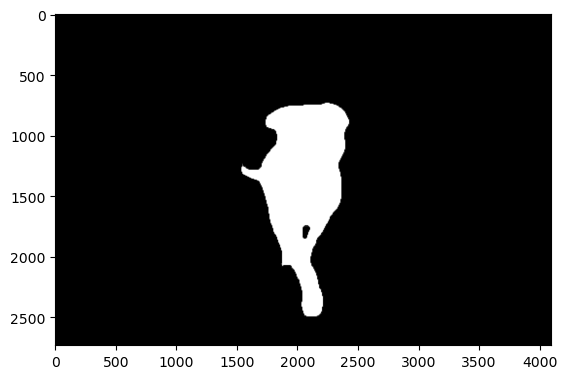

In [46]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
# seg_color 값이 dog 값이 므로 dog가가 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

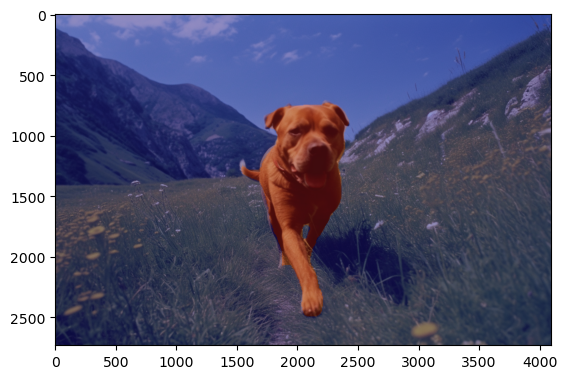

In [58]:
# 원본 = img_show에 할당당
img_show = img_orig.copy()
# True과 False인 값을 각각 255과 0으로 변경
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색상으로 변경경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본과 마스크 병합
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

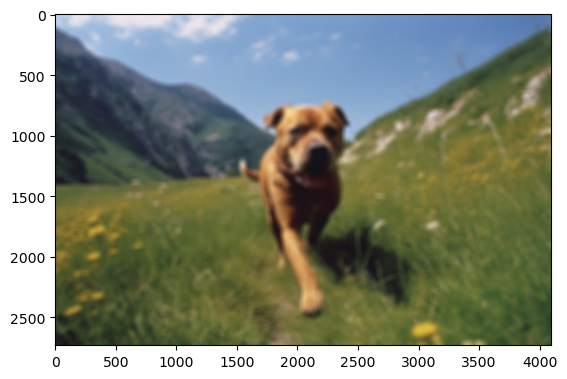

In [56]:
#원본 blurring
img_orig_blur = cv2.blur(img_orig, (50,50))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

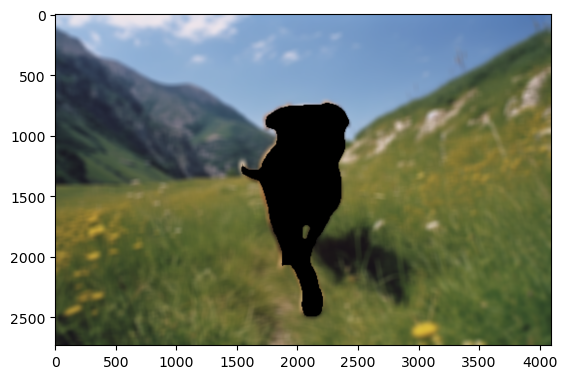

In [57]:
# 입력이미지 색상채널 변경
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

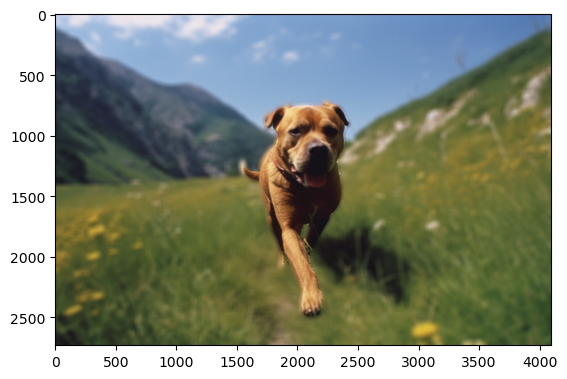

In [59]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

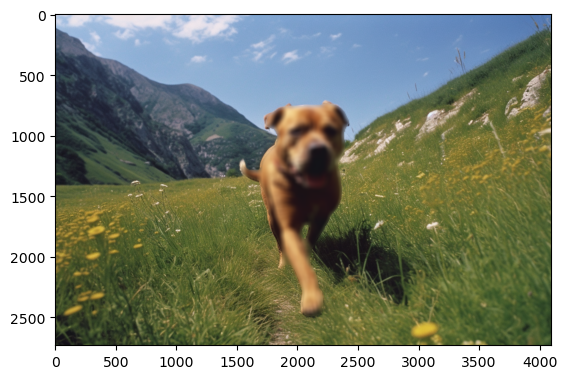

In [60]:
img_concat = np.where(img_mask_color==255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## person_shallow_focus


(1920, 1920, 3)


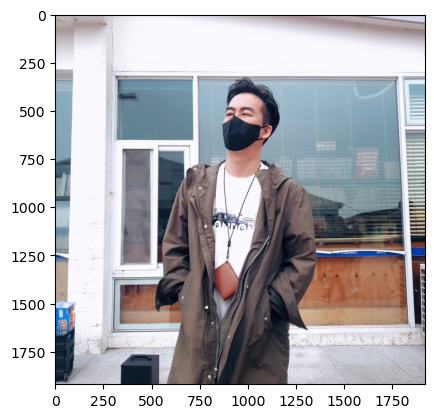

(1920, 1920, 3)


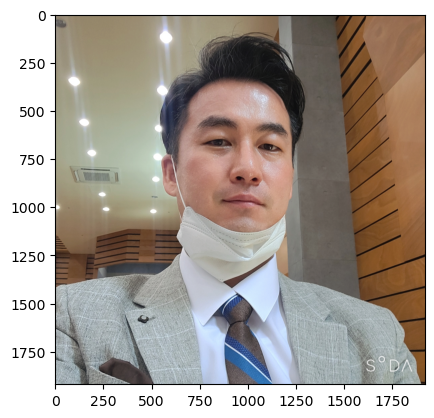

(2560, 1440, 3)


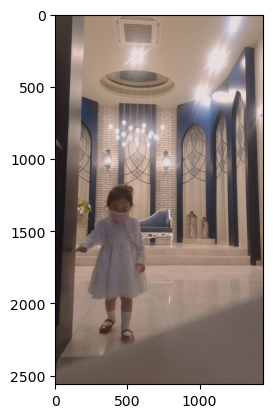

In [65]:
img_origs = []

for i in range(1,4):

    img_path = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\person'+str(i)+'.jpg'

    img_orig = cv2.imread(img_path) 
    img_origs.append(img_orig)
    
    print(img_orig.shape)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.show()

In [66]:
img_path_1 = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\person'+str(1)+'.jpg' 
img_path_2 = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\person'+str(2)+'.jpg'  
img_path_3 = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\person'+str(3)+'.jpg'  


segvalues_1, output_1 = model.segmentAsPascalvoc(img_path_1)
segvalues_2, output_2 = model.segmentAsPascalvoc(img_path_2)
segvalues_3, output_3 = model.segmentAsPascalvoc(img_path_3)


segvalues_list = [segvalues_1,segvalues_2,segvalues_3]
outputs = [output_1, output_2,output_3]

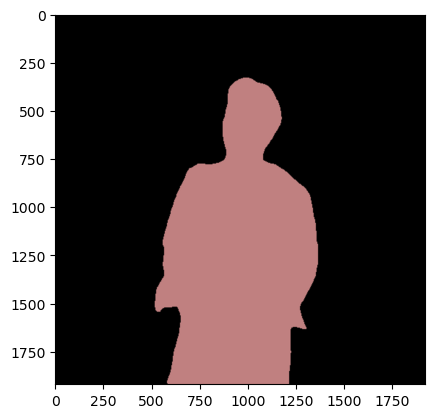

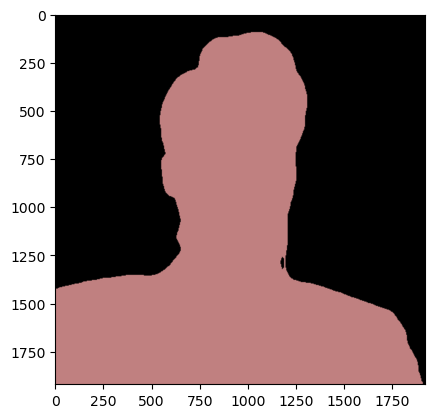

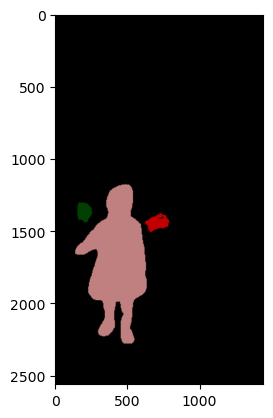

In [67]:
for output in outputs:

    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.show()

In [68]:
for i in segvalues_list:
    print(i)

{'class_ids': array([ 0, 15], dtype=int64), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
{'class_ids': array([ 0, 15], dtype=int64), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])}
{'class_ids': array([ 0,  9, 15, 16], dtype=int64), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,

In [73]:
segvalues_list = [segvalues_1, segvalues_2, segvalues_3]

for idx, segvalues in enumerate(segvalues_list, start=1):
    print(f"segvalues_{idx}:")
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])
    print()  

segvalues_1:
background
person

segvalues_2:
background
person

segvalues_3:
background
chair
person
pottedplant



In [75]:
print(colormap[15]) 

#RGB로 바꾸기!
seg_color = (128,128,192)
print(seg_color)

[192 128 128]
(128, 128, 192)


(1920, 1920)


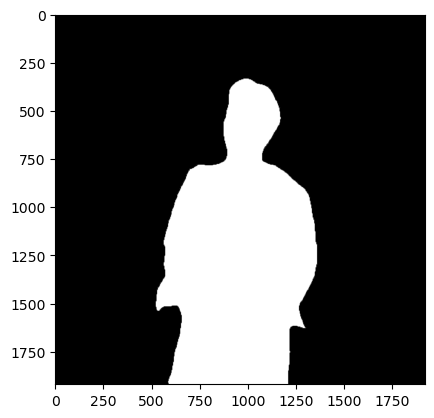

(1920, 1920)


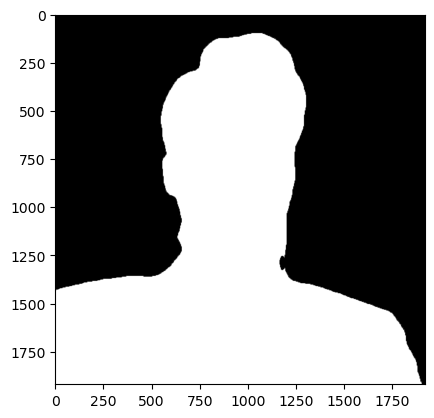

(2560, 1440)


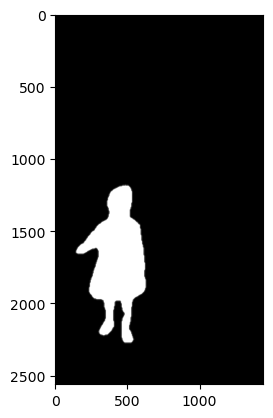

In [78]:
seg_maps = []

for output in outputs:
   
    seg_map = np.all(output==seg_color, axis=-1)
    seg_maps.append(seg_map)
    
    print(seg_map.shape)
    plt.imshow(seg_map, cmap='gray')
    plt.show()

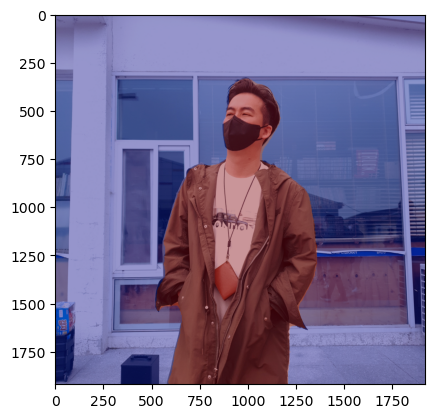

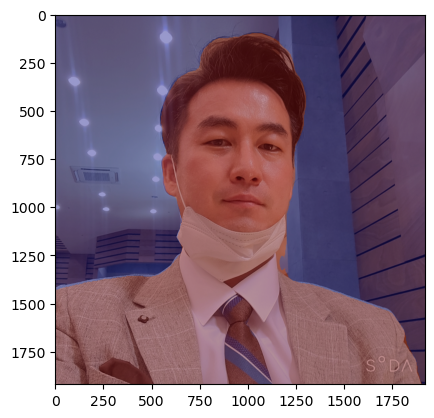

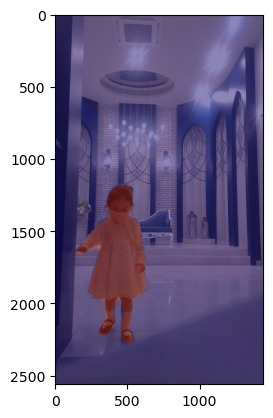

In [80]:
img_masks = []
color_masks = []

for img_orig, seg_map in zip(img_origs, seg_maps):

    img_show = img_orig.copy()
    img_mask = seg_map.astype(np.uint8) * 255
    img_masks.append(img_mask)
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    color_masks.append(color_mask)
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

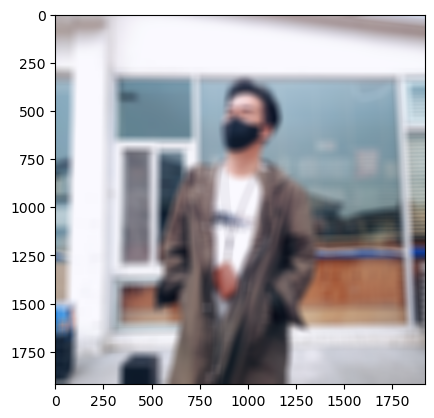

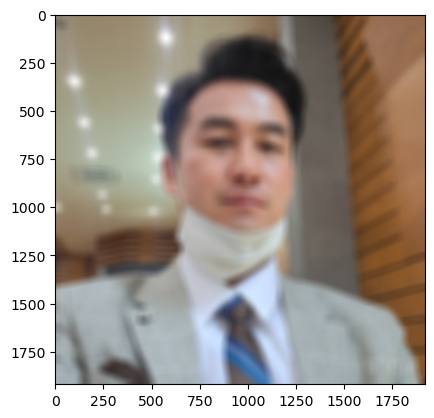

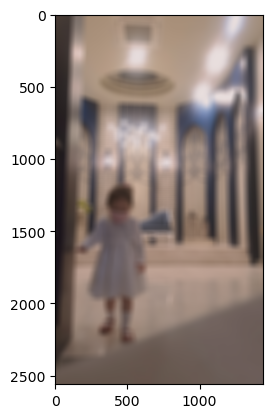

In [88]:
imgs_orig_blur = []

for img_orig in img_origs:
    img_orig_blur = cv2.blur(img_orig, (50,50))  
    imgs_orig_blur.append(img_orig_blur)
    
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()

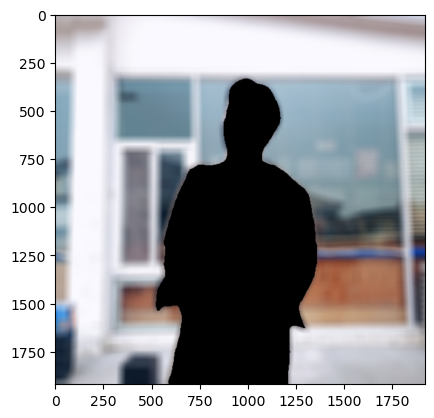

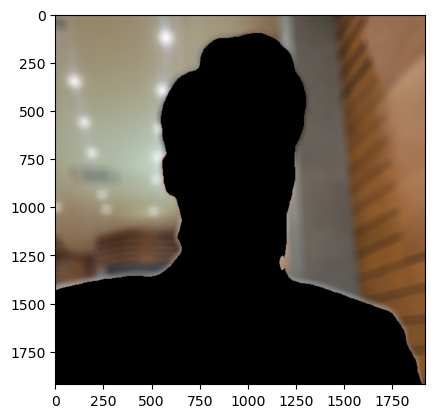

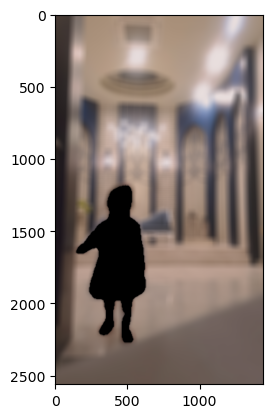

In [89]:
img_bg_blurs = []
img_mask_colors = []
for img_orig_blur, img_mask in zip(imgs_orig_blur, img_masks):
    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_mask_colors.append(img_mask_color)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    img_bg_blurs.append(img_bg_blur)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.show()

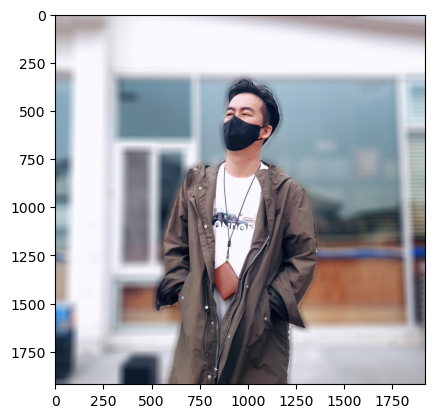

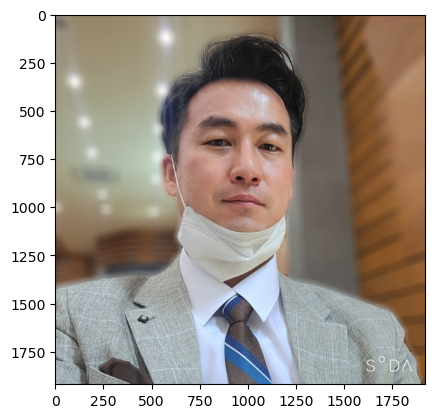

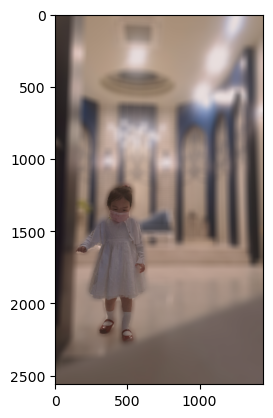

In [90]:
for img_orig, img_mask_color, img_bg_blur in zip(img_origs, img_mask_colors, img_bg_blurs):

    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

## 크로마키 배경 합성

(1920, 1920, 3)


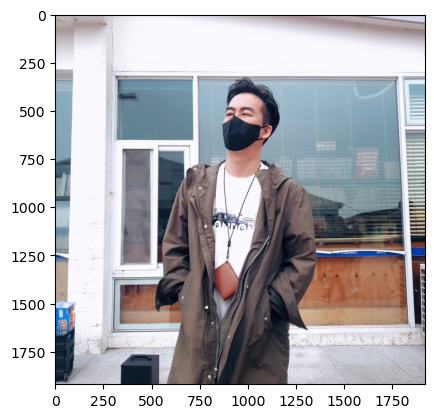

In [124]:
img_path= 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\person1.jpg' 
img_person = cv2.imread(img_path) 
print(img_person.shape)
plt.imshow(cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB))
plt.show()

In [125]:
segvalues, output = model.segmentAsPascalvoc(img_path)


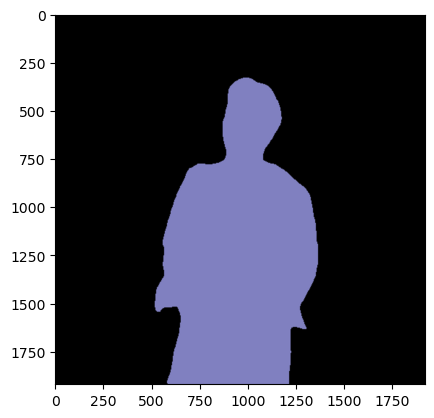

In [126]:
plt.imshow(output)
plt.show()

In [127]:
segvalues

{'class_ids': array([ 0, 15], dtype=int64),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [128]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [129]:
colormap[15]

array([192, 128, 128])

In [130]:
seg_color = (128,128,192)

(1920, 1920)


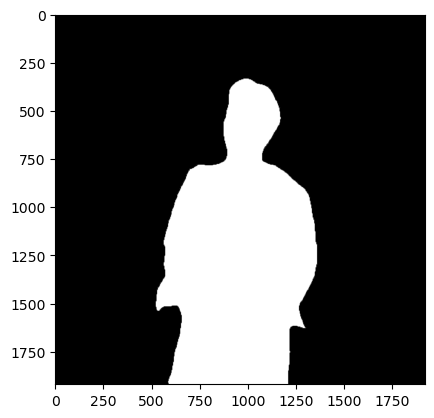

In [131]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

### 배경이미지 로드 및 리사이징

(1920, 1920, 3)


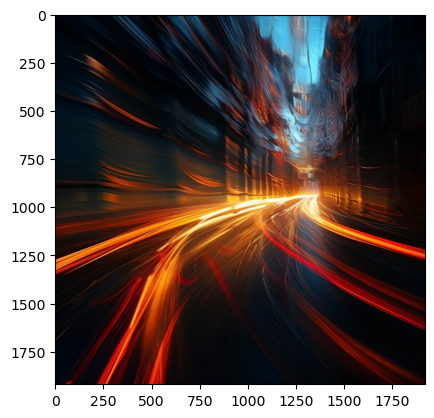

In [132]:
img_path = img_path= 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\background1.png' 
img_background = cv2.imread(img_path) 
img_background = cv2.resize(img_orig, dsize=(1920,1920))

print(img_background.shape)
plt.imshow(cv2.cvtColor(img_background, cv2.COLOR_BGR2RGB))
plt.show()

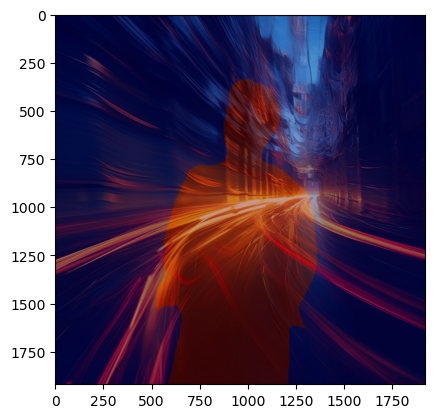

In [133]:
img_show = img_background.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

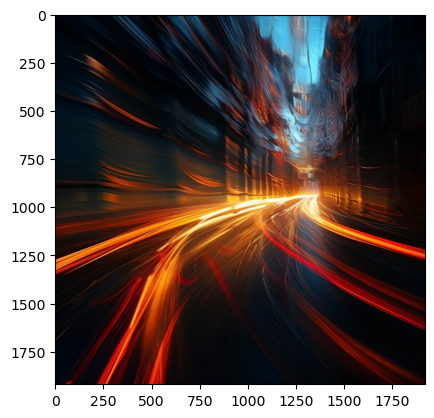

In [134]:
img_background_blur = cv2.blur(img_background, (1,1))  
plt.imshow(cv2.cvtColor(img_background_blur, cv2.COLOR_BGR2RGB))
plt.show()


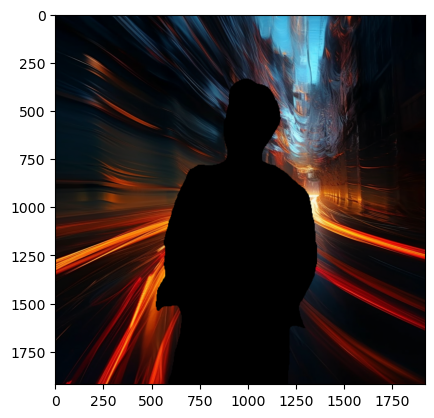

In [135]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_background_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()


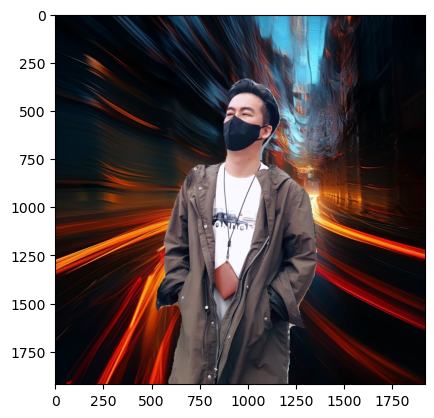

In [137]:
img_concat = np.where(img_mask_color==255, img_person, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 크로마키 2

(2560, 1440, 3)


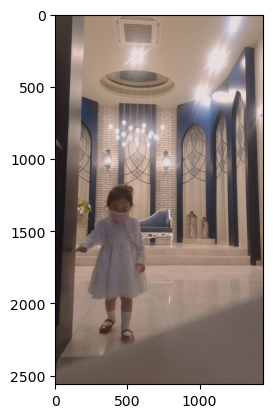

In [166]:
img_path_person = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\person3.jpg' 
img_ps2 = cv2.imread(img_path_person) 
print(img_ps2.shape)
plt.imshow(cv2.cvtColor(img_ps2, cv2.COLOR_BGR2RGB))
plt.show()


In [167]:
segvalues, output = model.segmentAsPascalvoc(img_path_person)
seg_color = (128,128,192)
seg_map = np.all(output==seg_color, axis=-1)


(2560, 1440, 3)


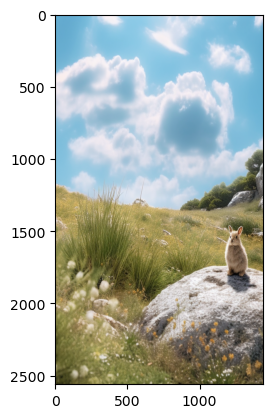

In [168]:
img_path_bg2 = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\background2.png' 
img_bg2 = cv2.imread(img_path_bg2) 
img_bg2 = cv2.resize(img_bg2, dsize=(1440,2560))

print(img_bg2.shape)
plt.imshow(cv2.cvtColor(img_bg2, cv2.COLOR_BGR2RGB))
plt.show()

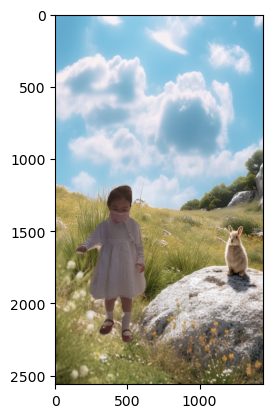

In [169]:
img_show = img_bg2.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_bg2, img_bg_mask)

img_concat = np.where(img_mask_color==255, img_ps2, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()


# Step 2 문제점 찾기

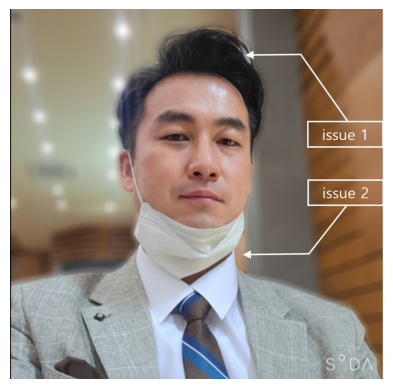

In [172]:
img_path_issue = 'C:\\Users\\User\\Documents\\GitHub\\mlops\\human_segmentation\\images\\seg_issue.jpg' 

img_issue = cv2.imread(img_path_issue) 
plt.imshow(cv2.cvtColor(img_issue, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

##### 굵직한 이슈는 없으나 굳이 찾는다면 머라카락 틈과 목 라인 부분에 배경이 전경으로 합류됨 

# Step 3. 해결 방법 제안

1. 후처리(Post-processing)로 경계 부드럽게 만들기   
    - Morphological Operations (침식, 팽창, 열림, 닫힘 등)
        - 침식(erode)과 팽창(dilate)을 활용해 구멍을 메우거나 잡음을 제거
        - 매우 작은 커널(예: 1x1, 3x3 등)을 이용하면 경계 부분의 잡음만 살짝 제거 가능
    - Blurring
        - 가우시안 블러나 Median 블러 등을 사용하여 심하게 구겨진 픽셀 경계 완화
        - 단순 마스크 경계를 부드럽게 하고 싶을 때 사용
        - 이들은 기본적으로 OpenCV나 이미지 처리 라이브러리(Python의 경우 cv2, Dart/Flutter에서는 해당 기능을 지원하는 플러그인)에 의존

2. 크로마키(Chroma Key) 마스크 및 알파 합성 기술 / Chroma Key Mask & Alpha Compositing
    - 알파 마스크(Alpha Mask) 사용
        - 세그멘테이션 결과를 1비트(흑백) 대신 알파 채널 기반으로 표현
        - 부드러운 경계를 위해 마스크값을 0에서 1 사이의 연속적인 실수(float)로 설정
    - Feathering 기법
        - 경계 부분 픽셀들을 일정 거리(예: 2~5 픽셀)만큼 그레이디언트 형태로 배분
        - 배경 이미지와 자연스럽게 섞이도록 처리
        - 이 방식을 사용하면 경계 부근이 서서히 투명해져, 최종 합성 시 훨씬 깔끔하게 보입

3. Advanced Refinement (CRF, GraphCut) :다소 학술적이며, 성능이 좋지만 구현 복잡도가 높은 편
    - Conditional Random Fields (CRF)
        - 객체 경계 세밀화에 많이 사용되는 기법으로 픽셀 간 상관관계를 모델링
        - 세그멘테이션 맵의 ‘라벨 불확실성’을 줄이고, 경계를 예리하게 만듦
    - GraphCut / GrabCut    
        - 전경과 배경 간의 에너지를 최소화하여 경계를 자동으로 추정
        - 기존 마스크를 초기값으로 주고 반복 최적화를 진행
        
4. Dart/Flutter에서의 간단한 후처리 예시
    ```
    import 'package:image/image.dart' as img;

    class ImagePostProcessor {
    // 이미지 이진 마스크(0 또는 255)를 받아서 미세 침식 처리
    // Takes a binary mask (0 or 255) and performs minor erosion
    img.Image erodeMask(img.Image mask, {int iterations = 1}) {
        // 각 픽셀을 스캔하며 작은 커널로 침식 연산을 수행
        // Perform erosion with a small kernel across the mask
        final width = mask.width;
        final height = mask.height;
        
        img.Image processed = img.Image.from(mask);

        for (int iter = 0; iter < iterations; iter++) {
        img.Image temp = img.Image.from(processed);
        for (int y = 1; y < height - 1; y++) {
            for (int x = 1; x < width - 1; x++) {
            // 3x3 커널 내 모든 값이 255인지 확인
            // Check if all values in the 3x3 kernel are 255
            bool allWhite = true;
            for (int ky = -1; ky <= 1; ky++) {
                for (int kx = -1; kx <= 1; kx++) {
                int pixel = temp.getPixel(x + kx, y + ky);
                int gray = img.getLuminance(pixel);
                if (gray < 128) {
                    allWhite = false;
                    break;
                }
                }
                if (!allWhite) break;
            }
            // 만약 3x3 모두가 255라면 255, 아니면 0
            // If all 3x3 pixels are 255, set to 255, otherwise 0
            if (!allWhite) {
                processed.setPixelRgba(x, y, 0, 0, 0, 255);
            } else {
                processed.setPixelRgba(x, y, 255, 255, 255, 255);
            }
            }
        }
        }
        return processed;
    }
    }
    ```
    - erodeMask 메서드는 입력받은 마스크 이미지를 반복적으로 침식(iterations)
    - 3x3 커널을 사용하여 경계 근방 픽셀의 세부 마스크를 슬며시 제거하거나 부드럽게
    - iterations 파라미터를 너무 늘리면 침식 정도가 강해져 모든 경계가 과도하게 잘릴 수 있음